# Inference

In [ ]:

# saved_model_dir_path = '/content/drive/MyDrive/[04] Penelitian/23G2/BIMA/CLIP'
# model_name = '2023autumn'
# saved_model_dir_path = r"C:\Users\Pongo\OneDrive\Documents\~Cornel\~Ideas n Innovation\Project\25-5-6 -- CLIP - SD\Models\Lora\2023autumn\2023autumn.safetensors"

# model_name = 'xzl'
# saved_model_dir_path = r"C:\Users\Pongo\OneDrive\Documents\~Cornel\~Ideas n Innovation\Project\25-5-6 -- CLIP - SD\Models\Lora\xzl\xzl.safetensors"
dataset_dir = r"C:\Users\Pongo\OneDrive\Documents\~Cornel\~Ideas n Innovation\Project\25-5-6 -- CLIP - SD\Dataset\Train\2_Enhance"

model_name = 'CLIP'
saved_model_dir_path = r"C:\Users\Pongo\OneDrive\Documents\~Cornel\~Ideas n Innovation\Project\25-5-6 -- CLIP - SD\Output\CLIP"

image_paths, texts = find_dataset_path(dataset_dir)

In [ ]:
from transformers import CLIPModel, CLIPProcessor

# Load the saved model and processor
model_path = saved_model_dir_path
model = CLIPModel.from_pretrained(model_path)
processor = CLIPProcessor.from_pretrained(model_path)

In [ ]:
temperature = model.logit_scale.exp().item()
temperature

94.80423736572266

In [ ]:
from transformers import CLIPModel, CLIPProcessor

def compute_clip_score(model, processor, image_path, text):
    image = Image.open(image_path).convert("RGB")
    # image = torch.randint(255, (3,224,224))
    inputs = processor(text=[text], images=[image], return_tensors="pt", padding=True, truncation=True, max_length=77)
    outputs = model(**inputs)
    logits_per_image = outputs.logits_per_image  # Similarity score
    return logits_per_image.item()

In [ ]:
# Example usage
# image_path = image_paths[1]
# text = texts[1]
# clip_score = compute_clip_score(model, processor, image_path, text)
# print(f"CLIPScore: {clip_score}")

In [ ]:
import matplotlib.pyplot as plt

# Compute CLIPScores
clip_scores = []
face_vs_attr = []
for image_path, caption in zip(image_paths, texts):
    score = compute_clip_score(model, processor, image_path, caption)
    clip_scores.append(score)
    if 'FACE' in image_path:
        face_vs_attr.append('face')
    else:
        face_vs_attr.append('attr')

# # Visualize CLIPScores
# plt.figure(figsize=(10, 6))
# plt.hist(clip_scores, bins=10, color='skyblue', edgecolor='black')
# plt.title("CLIPScore Distribution")
# plt.xlabel("CLIPScore")
# plt.ylabel("Frequency")
# plt.show()

# # Print scores with their corresponding image and caption
# for img, cap, score in zip(image_paths, texts, clip_scores):
#     print(f"Image: {img}, Caption: {cap}, CLIPScore: {score}")

In [ ]:
# Print scores with their corresponding image and caption
train_results = []
for img, cap, score, fva in zip(image_paths, texts, clip_scores, face_vs_attr):
    train_results += [
        {
            'img' : img,
            'cap' : cap,
            'score' : score,
            'face_vs_attr' : fva
        }
    ]

import pandas as pd

df = pd.DataFrame(train_results)
df.to_excel(f'/content/drive/MyDrive/[04] Penelitian/23G2/BIMA/inference_result/{model_name}.xlsx', index=False)

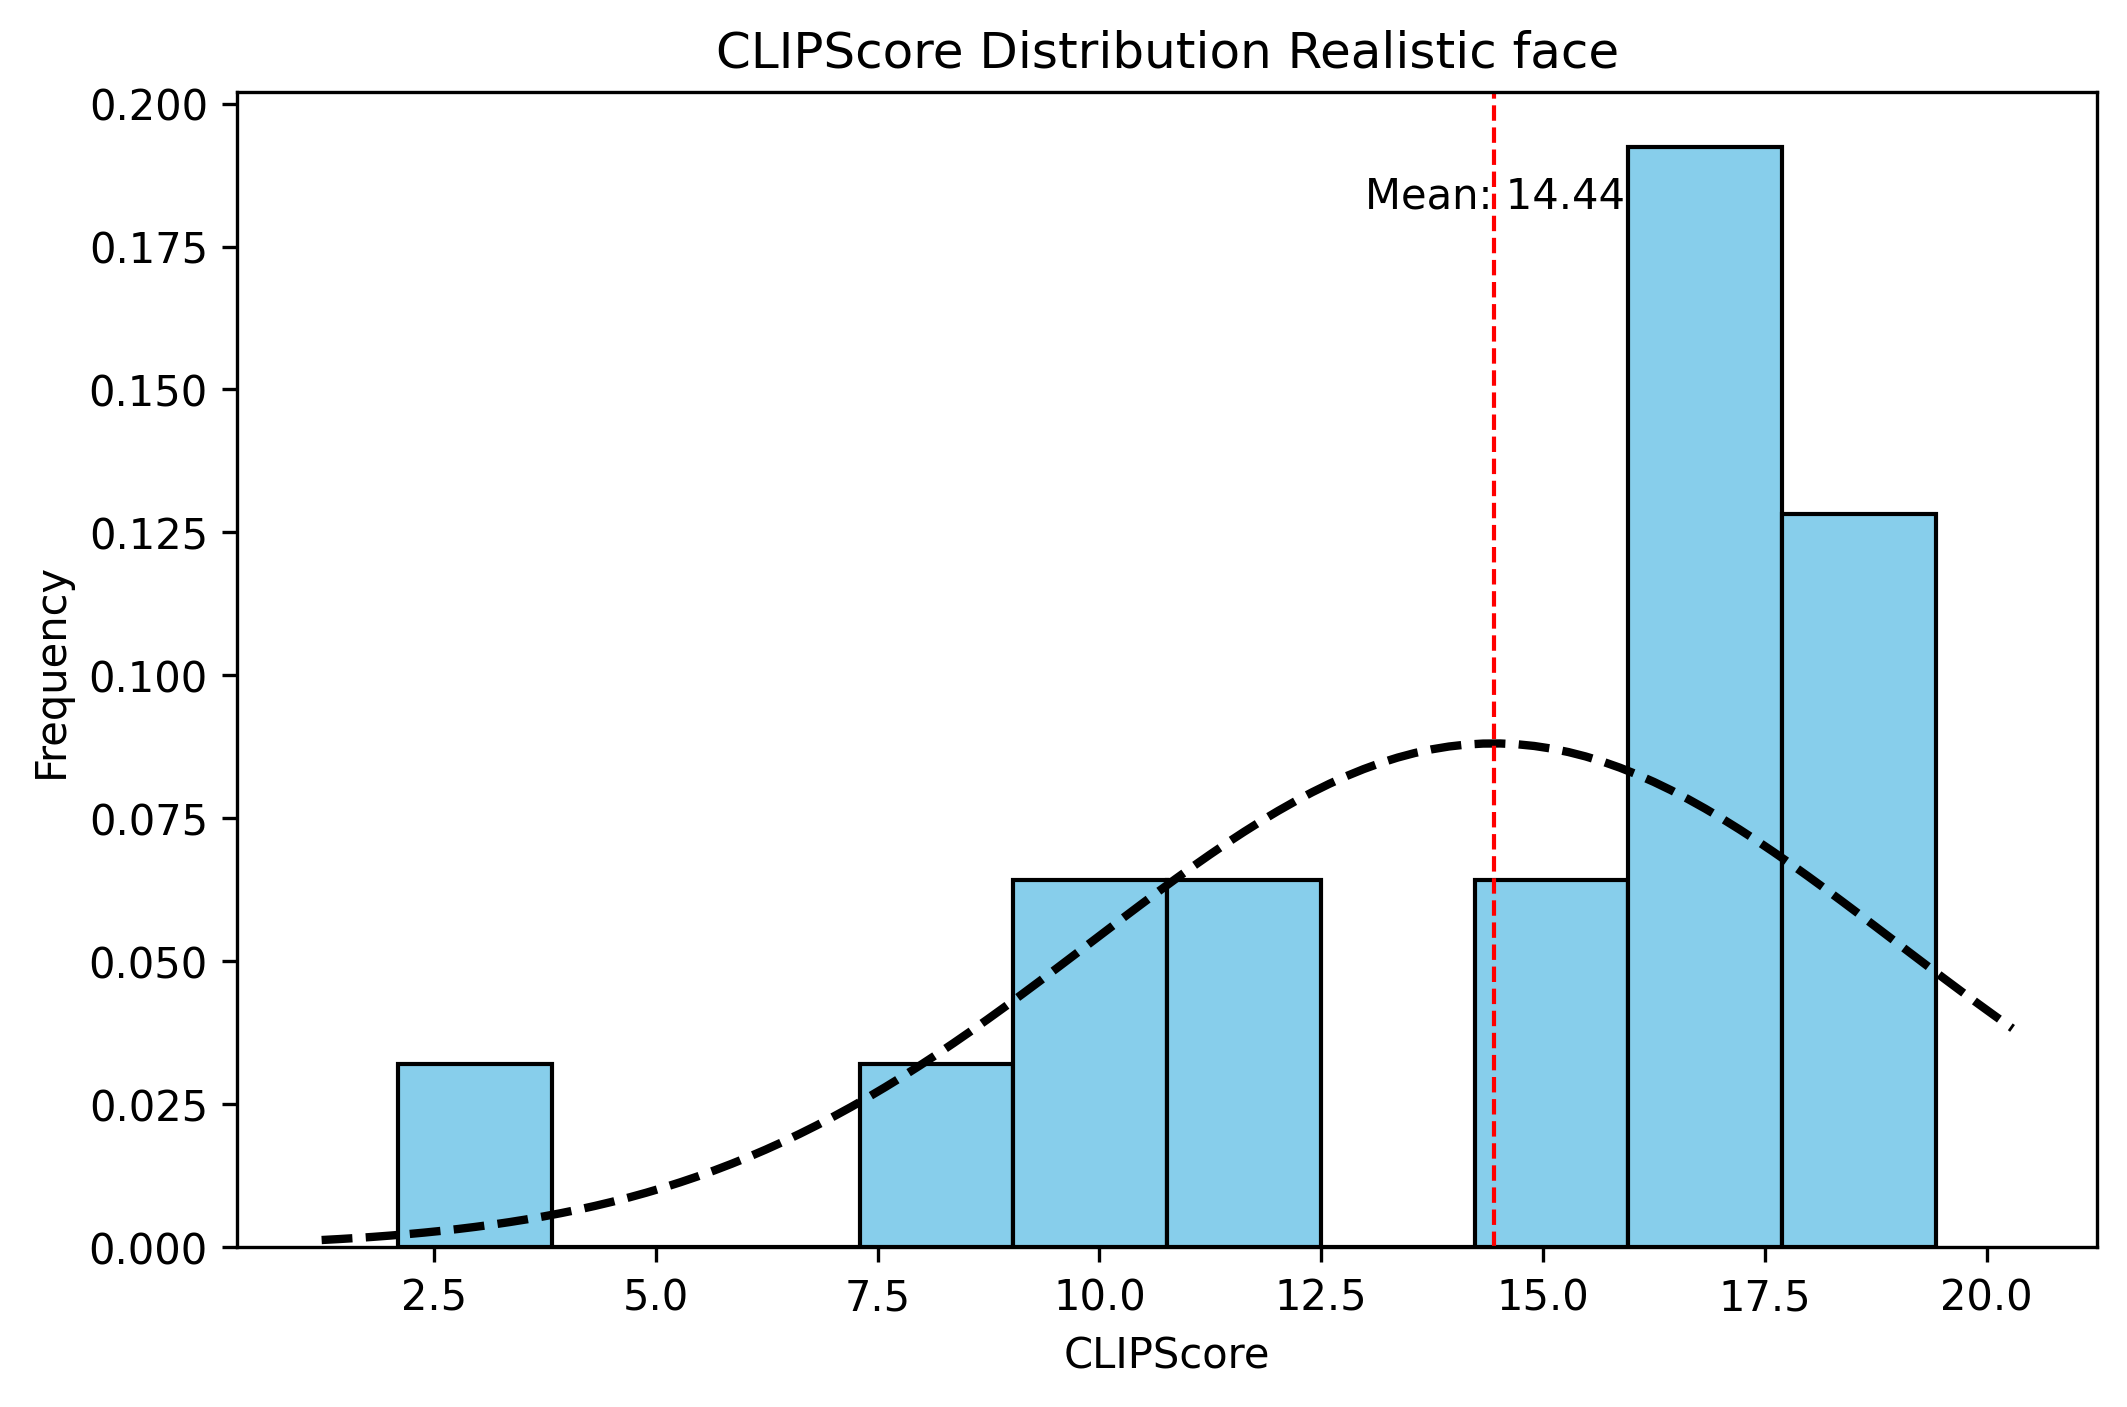

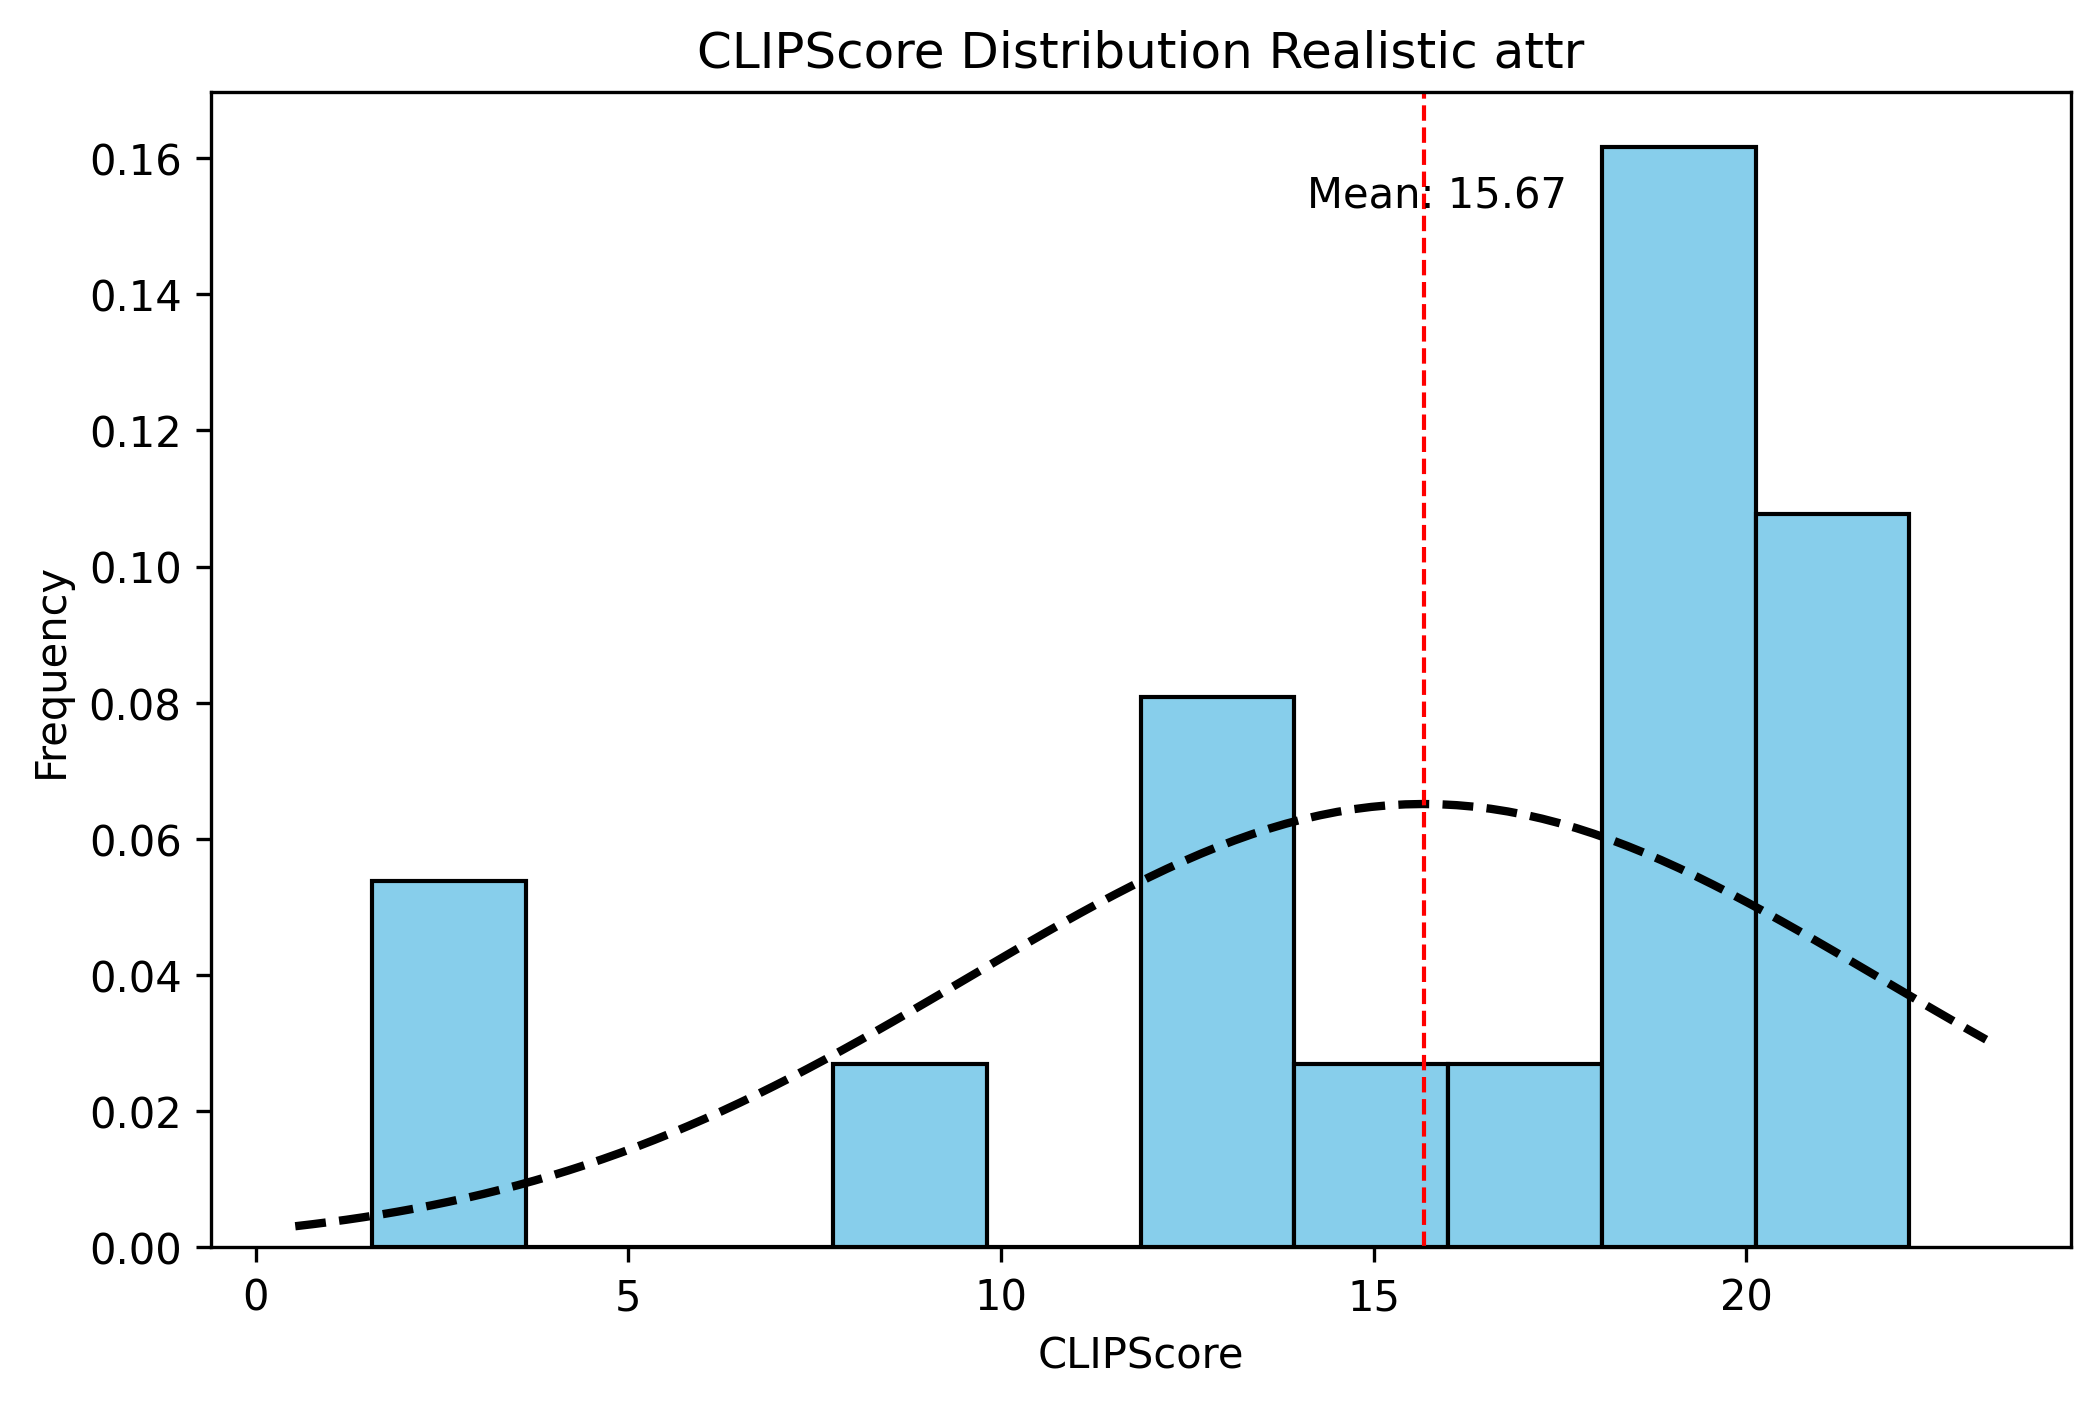

In [ ]:
# Visualize CLIPScores
from scipy.stats import norm
import numpy as np

for fva in ['face','attr']:
    plt.figure(figsize=(8, 5), dpi=300)
    result = plt.hist(df.loc[df['face_vs_attr'] == fva,['score']], bins=10, color='skyblue', density=True, edgecolor='black')
    mu, std = norm.fit(df.loc[df['face_vs_attr'] == fva,['score']])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k--', linewidth=2)
    plt.axvline(mu, color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(mu*0.9, max_ylim*0.9, 'Mean: {:.2f}'.format(mu))
    plt.title(f"CLIPScore Distribution {model_name} {fva}")
    plt.xlabel("CLIPScore")
    plt.ylabel("Frequency")
    plt.savefig(f'/content/drive/MyDrive/[04] Penelitian/23G2/BIMA/inference_result/{model_name}_{fva}.svg')
    plt.savefig(f'/content/drive/MyDrive/[04] Penelitian/23G2/BIMA/inference_result/{model_name}_{fva}.png')

In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/[04] Penelitian/23G2/BIMA/train_results.xlsx')
df

,img,cap,score
0,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,20.047153
1,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,20.152716
2,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,20.082415
3,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,20.134302
4,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,20.078552
...,...,...,...
179,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,24.470486
180,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,24.338884
181,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,23.767962
182,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,/content/drive/MyDrive/[04] Penelitian/23G2/BI...,23.875803


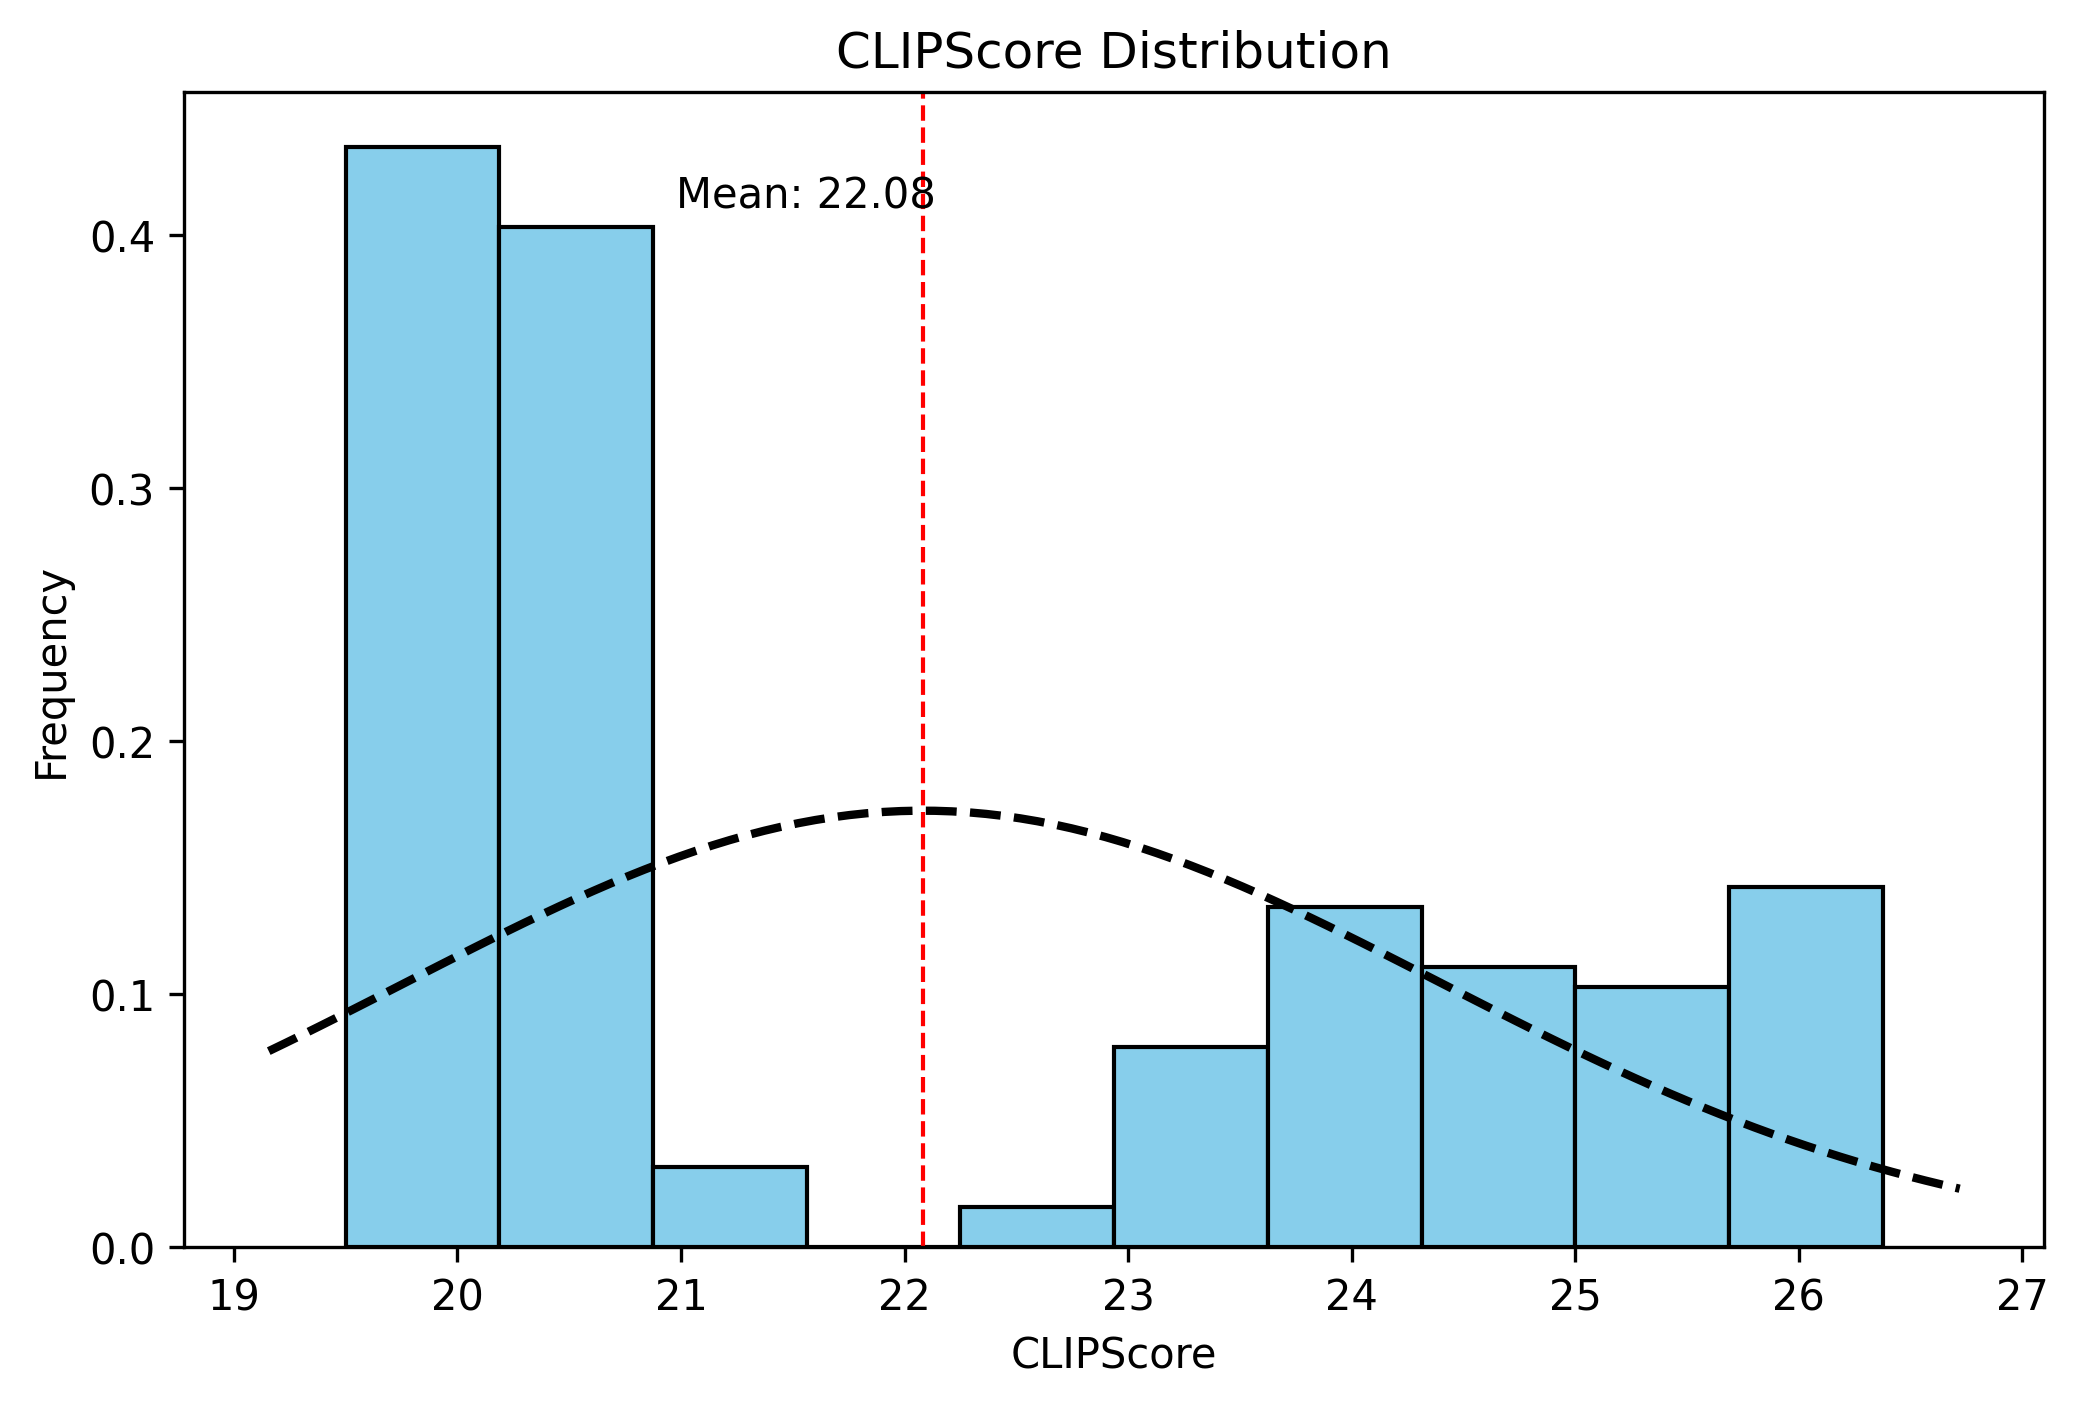

In [ ]:
# Visualize CLIPScores
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5), dpi=300)
result = plt.hist(df['score'], bins=10, color='skyblue', density=True, edgecolor='black')
mu, std = norm.fit(df['score'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k--', linewidth=2)
plt.axvline(mu, color='r', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mu*0.95, max_ylim*0.9, 'Mean: {:.2f}'.format(mu))
plt.title(f"CLIPScore Distribution")
plt.xlabel("CLIPScore")
plt.ylabel("Frequency")
plt.savefig(f'/content/drive/MyDrive/[04] Penelitian/23G2/BIMA/training_results.svg')
plt.savefig(f'/content/drive/MyDrive/[04] Penelitian/23G2/BIMA/training_results.png')